In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_produccion = pd.read_csv('datos_produccion_anual_35.csv')
df_produccion = df_produccion[['fecha','esquila','kilos_lana']]
df_produccion.fecha = pd.to_datetime(df_produccion.fecha)
df_produccion['año'] = df_produccion.fecha.dt.year
df_produccion = df_produccion[['año', 'esquila', 'kilos_lana']]

La sonda 10 tiene los datos climaticos del Dique, que es lo mas cercano a los campos del productor de los datos de esquila.

In [3]:
df_clima = pd.read_csv('info_climatica_10.csv')
df_clima.rename(columns={'temperatura_maxima':'t_min',
                         'temperatura_media':'t_max',
                         'temperatura_minima':'t_med'},inplace=True)
df_clima = df_clima[['periodo','mm_lluvia']]
df_clima.periodo = pd.to_datetime(df_clima.periodo)

In [4]:
#Me quedo con los meses Enero, Febrero y Marzo de cada año para luego sumar los mm
#de lluvia acumulados en esos meses y agrupar por año.

df_clima = df_clima[df_clima.periodo.dt.month.isin([1,2,3])]
df_clima['año'] = df_clima.periodo.dt.year
df_clima=df_clima[['año','mm_lluvia']]

#El año 2008 para este dataset de clima (sonda=10) no tiene datos por eso lo quito.
df_clima = df_clima[~df_clima.año.isin([2008])]

In [5]:
c = df_clima.groupby('año')['mm_lluvia'].sum().reset_index()

In [6]:
resul = pd.merge(c, df_produccion, left_on='año',right_on='año', how='inner')

In [7]:
resul

,año,mm_lluvia,esquila,kilos_lana
0,2010,67.4,2221,9164
1,2011,27.8,1651,6516
2,2012,72.6,1708,8376
3,2013,57.6,1976,9892
4,2014,14.0,2788,10510
5,2015,25.0,2738,10776
6,2016,27.6,3289,10990
7,2017,39.0,3484,11200
8,2018,6.6,2963,9193
9,2019,8.0,3520,13027


Variables independientes: 
- mm de lluvia acumulados en Enero, Febrero y marzo de cada año
- Cantidad de animales esquilados

Variables dependientes:
- Kilos de Lana producidos

In [8]:
X_multiple = resul[['mm_lluvia','esquila']]
y_multiple = resul[['kilos_lana']]

In [18]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

In [19]:
lr_multiple = linear_model.LinearRegression()

In [20]:
lr_multiple.fit(X_train, y_train)
#lr_multiple.fit(X_multiple, y_multiple)

LinearRegression()

In [21]:
Y_pred_multiple = lr_multiple.predict(X_test)

In [29]:
print('Precisión del modelo:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

Precisión del modelo:
0.8352%


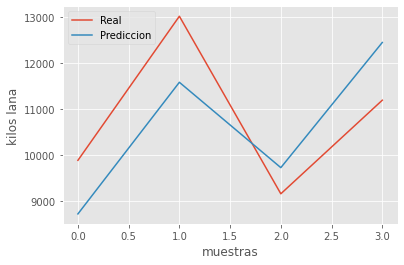

In [30]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('kilos lana')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()